In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

import os
import random

import pandas as pd
import seaborn as sns

import tensorflow as tf
from keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Conv2D, MaxPooling2D, Dropout, SpatialDropout2D, BatchNormalization,Dense, Flatten
from tensorflow.keras.layers import ELU
from keras.optimizers import Adam

from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.utils import class_weight

In [2]:
path = "/kaggle/input/face-detection-dataset"
train_img_path = "/kaggle/input/face-detection-dataset/images/train"
val_img_path = "/kaggle/input/face-detection-dataset/images/val"

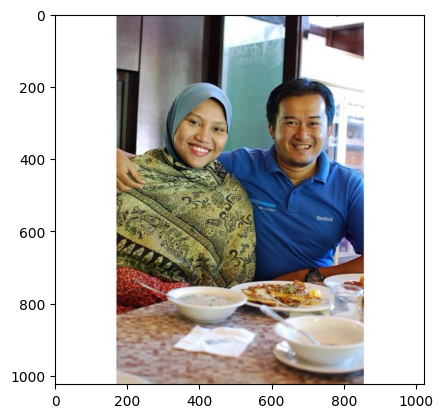

In [3]:
img = cv2.cvtColor(cv2.imread('/kaggle/input/face-detection-dataset/images/train/00006c07d2b033d1.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [4]:
# open text data
label= open("/kaggle/input/face-detection-dataset/labels2/00006c07d2b033d1.txt", "r")

# show content 
for row in label:
    print(row.strip())  # strip() entfernt überflüssige Leerzeichen und Zeilenumbrüche

# close text data
label.close()

Human face 332.8 235.199488 475.200512 432.0
Human face 609.599488 227.2 755.2 420.799488


In [30]:
# open text data
label = open("/kaggle/input/face-detection-dataset/labels/train/00006c07d2b033d1.txt", "r")

# show content 
for row in label:
    print(row.strip())  # strip() entfernt überflüssige Leerzeichen und Zeilenumbrüche

# close text data
label.close()

0 0.3943359375 0.325390125 0.139063 0.192188
0 0.6656245 0.315625 0.1421880000000001 0.189062


[['332.8', '235.199488', '475.200512', '432.0'], ['609.599488', '227.2', '755.2', '420.799488']]


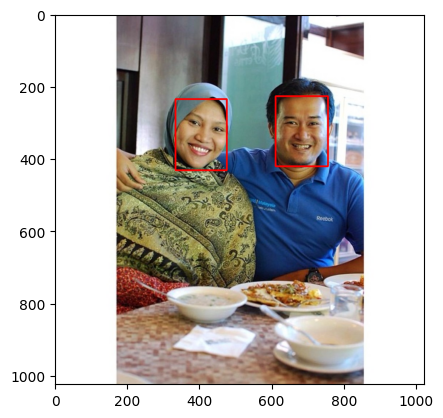

In [46]:
import cv2
import re

img = cv2.cvtColor(cv2.imread('/kaggle/input/face-detection-dataset/images/train/00006c07d2b033d1.jpg'), cv2.COLOR_BGR2RGB)

bb_coor = []
with open('/kaggle/input/face-detection-dataset/labels2/00006c07d2b033d1.txt', 'r') as data:
    for row in data:
        float_numbers = re.findall(r'\d+\.\d+', row)
        bb_coor.append(float_numbers)

print(bb_coor)

for i in range(0, len(bb_coor)):
    cv2.rectangle(img, (round(float(bb_coor[i][0])), 
                        round(float(bb_coor[i][1]))),
                  (round(float(bb_coor[i][2])),
                   round(float(bb_coor[i][3]))), (255, 0, 0), 3)

plt.imshow(img)

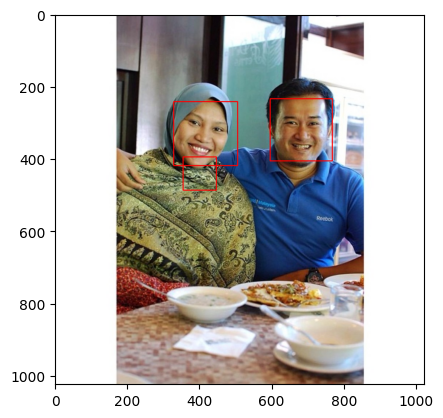

In [47]:
img = cv2.cvtColor(cv2.imread('/kaggle/input/face-detection-dataset/images/train/00006c07d2b033d1.jpg'), cv2.COLOR_BGR2RGB)

# Face detection with haarcascade classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +
                                    'haarcascade_frontalface_default.xml')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
plt.imshow(img)